## Background information
Oil and gas reservoirs lie deep beneath the Earth's surface. Geologists and engineers cannot examine the rock formations in situ, so tools called sondes go there for them. Specialists lower these tools into a wellbore and obtain measurements of subsurface properties. The data are displayed as a series of measurements covering a depth range in a display called a well log. Often, several tools are run simultaneously as a logging string, and the combination of results is more informative than each individual measurement(https://www.slb.com/resource-library/oilfield-review/defining-series/defining-logging).

Link below gives an overview of interpreting lithology using Gamma Ray, Density porosity and Neutron Porosity logs. http://www.kgs.ku.edu/Publications/Bulletins/LA/05_overlay.html 

## Objective
Train a Machine Learning model to predict lithology using log measurements in an oil & gas well.

## Data Source
LAS file (1033440835.las) containing Gamma Ray, Caliper, Density Porosity and Neutron Porosity for well Beck 'A' #1 that is used in the overview link above was downloaded from the link below. https://chasm.kgs.ku.edu/ords/las.lasd5.SelectWells 
Relevant log data was extracted to an excel file (Log_Lithology_classification.csv).
Please refer to http://www.kgs.ku.edu/General/copyright.html regarding use of data / information from Kansas Geological Survey.

In [1]:
import graphviz
import math
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from platform import python_version

print('The Python version is {}.' .format(python_version()))
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The Python version is 3.8.2.
The scikit-learn version is 0.23.2.


In [92]:
df = pd.read_csv('Log_Lithology_classification.csv')
df.head()

,Depth(Ft),GR,Caliper(in),NPHI(%),DPHI(%),Lithology
0,2250.0,14.776186,8.370518,25.146767,55.958485,Dolomite
1,2250.5,15.843265,8.370518,24.036467,53.805928,Dolomite
2,2251.0,16.806503,8.370518,23.568594,53.260437,Dolomite
3,2251.5,18.414649,8.370518,23.725506,54.108681,Dolomite
4,2252.0,18.257985,8.370562,23.282512,53.874654,Dolomite


GR: Gamma ray log, NPHI: Neutron porosity , DPHI: Density porosity

In [3]:
df.describe()

,Depth(Ft),GR,Caliper(in),NPHI(%),DPHI(%)
count,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000
mean,2500.000000,52.685686,8.511693,10.561586,45.632754
std,144.554056,50.702697,0.199315,8.183598,6.060791
min,2250.000000,9.853536,8.251723,-0.178926,34.042412
25%,2375.000000,20.213953,8.431684,1.703115,41.405277
50%,2500.000000,26.284567,8.469221,10.995225,44.938180
75%,2625.000000,74.233673,8.529872,17.558619,48.277270
max,2750.000000,259.688218,10.762302,31.206097,67.309476


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Depth(Ft)    1001 non-null   float64
 1   GR           1001 non-null   float64
 2   Caliper(in)  1001 non-null   float64
 3   NPHI(%)      1001 non-null   float64
 4   DPHI(%)      1001 non-null   float64
 5   Lithology    1001 non-null   object 
dtypes: float64(5), object(1)
memory usage: 47.0+ KB


In [7]:
df.isnull().sum()

Depth(Ft)      0
GR             0
Caliper(in)    0
NPHI(%)        0
DPHI(%)        0
Lithology      0
dtype: int64

## Data Visualization

In [8]:
df.columns

Index(['Depth(Ft)', 'GR', 'Caliper(in)', 'NPHI(%)', 'DPHI(%)', 'Lithology'], dtype='object')

<AxesSubplot:ylabel='Frequency'>

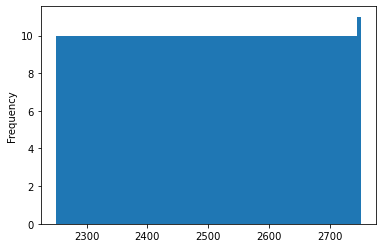

In [11]:
df['Depth(Ft)'].plot(kind='hist', bins=100)

<AxesSubplot:ylabel='Frequency'>

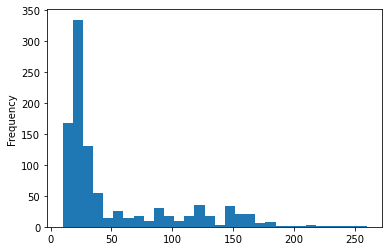

In [4]:
df['GR'].plot(kind='hist', bins=30)

<AxesSubplot:ylabel='Frequency'>

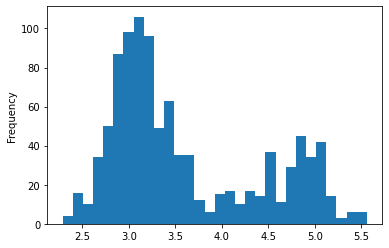

In [12]:
df['log_GR'] = np.log(df['GR'])
df['log_GR'].plot(kind='hist', bins=30)

<AxesSubplot:ylabel='Frequency'>

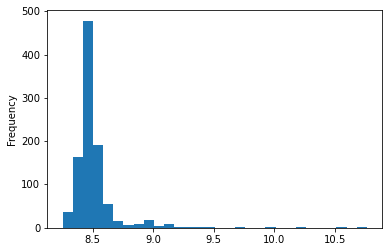

In [17]:
df['Caliper(in)'].plot(kind='hist', bins=30)

<AxesSubplot:ylabel='Frequency'>

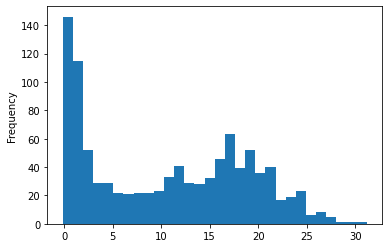

In [18]:
df['NPHI(%)'].plot(kind='hist', bins=30)

<AxesSubplot:ylabel='Frequency'>

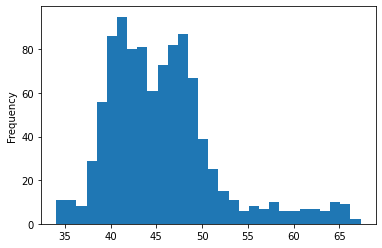

In [19]:
df['DPHI(%)'].plot(kind='hist', bins=30)

<AxesSubplot:>

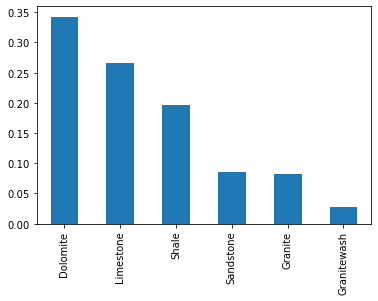

In [20]:
df['Lithology'].value_counts(normalize=True).plot(kind='bar')

In [104]:
df.describe()

,Depth(Ft),GR,Caliper(in),NPHI(%),DPHI(%)
count,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000
mean,2500.000000,52.685686,8.511693,10.561586,45.632754
std,144.554056,50.702697,0.199315,8.183598,6.060791
min,2250.000000,9.853536,8.251723,-0.178926,34.042412
25%,2375.000000,20.213953,8.431684,1.703115,41.405277
50%,2500.000000,26.284567,8.469221,10.995225,44.938180
75%,2625.000000,74.233673,8.529872,17.558619,48.277270
max,2750.000000,259.688218,10.762302,31.206097,67.309476


In [105]:
#x = df.drop(['Lithology', 'GR', 'Depth(Ft)'],axis=1) ## Lithology is the target values
x = df.drop(['Lithology', 'Depth(Ft)'],axis=1)
y = df['Lithology']

In [106]:
x.describe()

,GR,Caliper(in),NPHI(%),DPHI(%)
count,1001.000000,1001.000000,1001.000000,1001.000000
mean,52.685686,8.511693,10.561586,45.632754
std,50.702697,0.199315,8.183598,6.060791
min,9.853536,8.251723,-0.178926,34.042412
25%,20.213953,8.431684,1.703115,41.405277
50%,26.284567,8.469221,10.995225,44.938180
75%,74.233673,8.529872,17.558619,48.277270
max,259.688218,10.762302,31.206097,67.309476


### Standardize
Standardize features by removing the mean and scaling to unit variance

In [107]:
from sklearn.preprocessing import StandardScaler

In [108]:
scaler = StandardScaler()
scaler.fit(x)   
scaled_features = scaler.transform(x)

In [109]:
x_std = pd.DataFrame(scaled_features,columns=x.columns)
x_std.head()

,GR,Caliper(in),NPHI(%),DPHI(%)
0,-0.748056,-0.708657,1.783136,1.704545
1,-0.727000,-0.708657,1.647395,1.349207
2,-0.707992,-0.708657,1.590194,1.259158
3,-0.676259,-0.708657,1.609378,1.399184
4,-0.679351,-0.708435,1.555219,1.360552


In [110]:
x_std.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   GR           1001 non-null   float64
 1   Caliper(in)  1001 non-null   float64
 2   NPHI(%)      1001 non-null   float64
 3   DPHI(%)      1001 non-null   float64
dtypes: float64(4)
memory usage: 31.4 KB


### Split training and testing data

In [111]:
from sklearn.model_selection import train_test_split

In [112]:
x_train, x_test, y_train, y_test = train_test_split(x_std, y, test_size=0.20, random_state=42, stratify = y)

In [113]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 441 to 499
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   GR           800 non-null    float64
 1   Caliper(in)  800 non-null    float64
 2   NPHI(%)      800 non-null    float64
 3   DPHI(%)      800 non-null    float64
dtypes: float64(4)
memory usage: 31.2 KB


In [98]:
y_train.value_counts()

Dolomite       274
Limestone      213
Shale          157
Sandstone       68
Granite         66
Granitewash     22
Name: Lithology, dtype: int64

In [99]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 554 to 821
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   GR           201 non-null    float64
 1   Caliper(in)  201 non-null    float64
 2   NPHI(%)      201 non-null    float64
 3   DPHI(%)      201 non-null    float64
dtypes: float64(4)
memory usage: 7.9 KB


In [100]:
y_test.value_counts()

Dolomite       69
Limestone      53
Shale          40
Sandstone      17
Granite        16
Granitewash     6
Name: Lithology, dtype: int64

## Data Training and Testing

## Training on Decision Tree

In [28]:
from sklearn import tree
from sklearn.datasets import *
from sklearn.metrics import classification_report,confusion_matrix

In [120]:
dtc_104 = tree.DecisionTreeClassifier(criterion = "entropy", max_depth = 23, min_samples_leaf = 4)
dtc_104_fit = dtc_104.fit(x_train, y_train)

### Cross Validation

In [47]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

In [121]:
cv_results = cross_validate(dtc_104_fit, x_train, y_train, cv=10, scoring=['accuracy', 'precision_macro', 'precision_weighted', 'f1_macro', 'f1_weighted'])
cv_results

{'fit_time': array([0.006423  , 0.0065589 , 0.00723195, 0.00647926, 0.00480914,
        0.00487304, 0.00495911, 0.00788593, 0.00484681, 0.00458789]),
 'score_time': array([0.00739503, 0.00697422, 0.0111289 , 0.00564194, 0.00563502,
        0.00560999, 0.00582814, 0.00571012, 0.00543618, 0.00550008]),
 'test_accuracy': array([0.9   , 0.9625, 0.975 , 0.9125, 0.9375, 0.975 , 0.975 , 0.9625,
        0.9375, 0.8875]),
 'test_precision_macro': array([0.84953704, 0.89285714, 0.98262032, 0.85182645, 0.92933904,
        0.98647186, 0.93402778, 0.95679012, 0.96290188, 0.85729167]),
 'test_precision_weighted': array([0.91996528, 0.975     , 0.97630348, 0.92283177, 0.94152291,
        0.97544643, 0.97994792, 0.96805556, 0.94056472, 0.91351562]),
 'test_f1_macro': array([0.86912393, 0.90952381, 0.93248767, 0.82372895, 0.88579721,
        0.97657343, 0.94532516, 0.96355244, 0.90367616, 0.84823557]),
 'test_f1_weighted': array([0.90443109, 0.96583333, 0.97313777, 0.91190136, 0.93611546,
        0.974

In [122]:
print('Accuracy is {}.' .format(cv_results['test_accuracy'].mean()))
print('Macro Precision is {}.' .format(cv_results['test_precision_macro'].mean()))
print('Weighted Precision is {}.' .format(cv_results['test_precision_weighted'].mean()))
print('Macro F1 score is {}.' .format(cv_results['test_f1_macro'].mean()))
print('Weighted F1 score is {}.' .format(cv_results['test_f1_weighted'].mean()))

Accuracy is 0.9424999999999999.
Macro Precision is 0.9203663310021802.
Weighted Precision is 0.9513153670323471.
Macro F1 score is 0.9058024326988612.
Weighted F1 score is 0.9429453043979992.


### Visualizing Tree

In [123]:
x_features = x.columns.tolist()
y_target = y.unique().tolist()

In [124]:
text_representation = tree.export_text(dtc_104_fit, feature_names = x_features)
print(text_representation)

|--- GR <= -0.16
|   |--- NPHI(%) <= -0.46
|   |   |--- DPHI(%) <= -1.37
|   |   |   |--- NPHI(%) <= -0.68
|   |   |   |   |--- class: Sandstone
|   |   |   |--- NPHI(%) >  -0.68
|   |   |   |   |--- GR <= -0.45
|   |   |   |   |   |--- class: Dolomite
|   |   |   |   |--- GR >  -0.45
|   |   |   |   |   |--- class: Sandstone
|   |   |--- DPHI(%) >  -1.37
|   |   |   |--- Caliper(in) <= 0.22
|   |   |   |   |--- Caliper(in) <= -0.56
|   |   |   |   |   |--- class: Sandstone
|   |   |   |   |--- Caliper(in) >  -0.56
|   |   |   |   |   |--- NPHI(%) <= -0.62
|   |   |   |   |   |   |--- Caliper(in) <= 0.02
|   |   |   |   |   |   |   |--- class: Limestone
|   |   |   |   |   |   |--- Caliper(in) >  0.02
|   |   |   |   |   |   |   |--- DPHI(%) <= -0.81
|   |   |   |   |   |   |   |   |--- class: Limestone
|   |   |   |   |   |   |   |--- DPHI(%) >  -0.81
|   |   |   |   |   |   |   |   |--- class: Limestone
|   |   |   |   |   |--- NPHI(%) >  -0.62
|   |   |   |   |   |   |--- DPHI(%) <=

In [125]:
fig = plt.figure(figsize = [100,80], dpi = 150)
ax = tree.plot_tree(dtc_104_fit, feature_names = x_features, class_names = y_target)
plt.show()

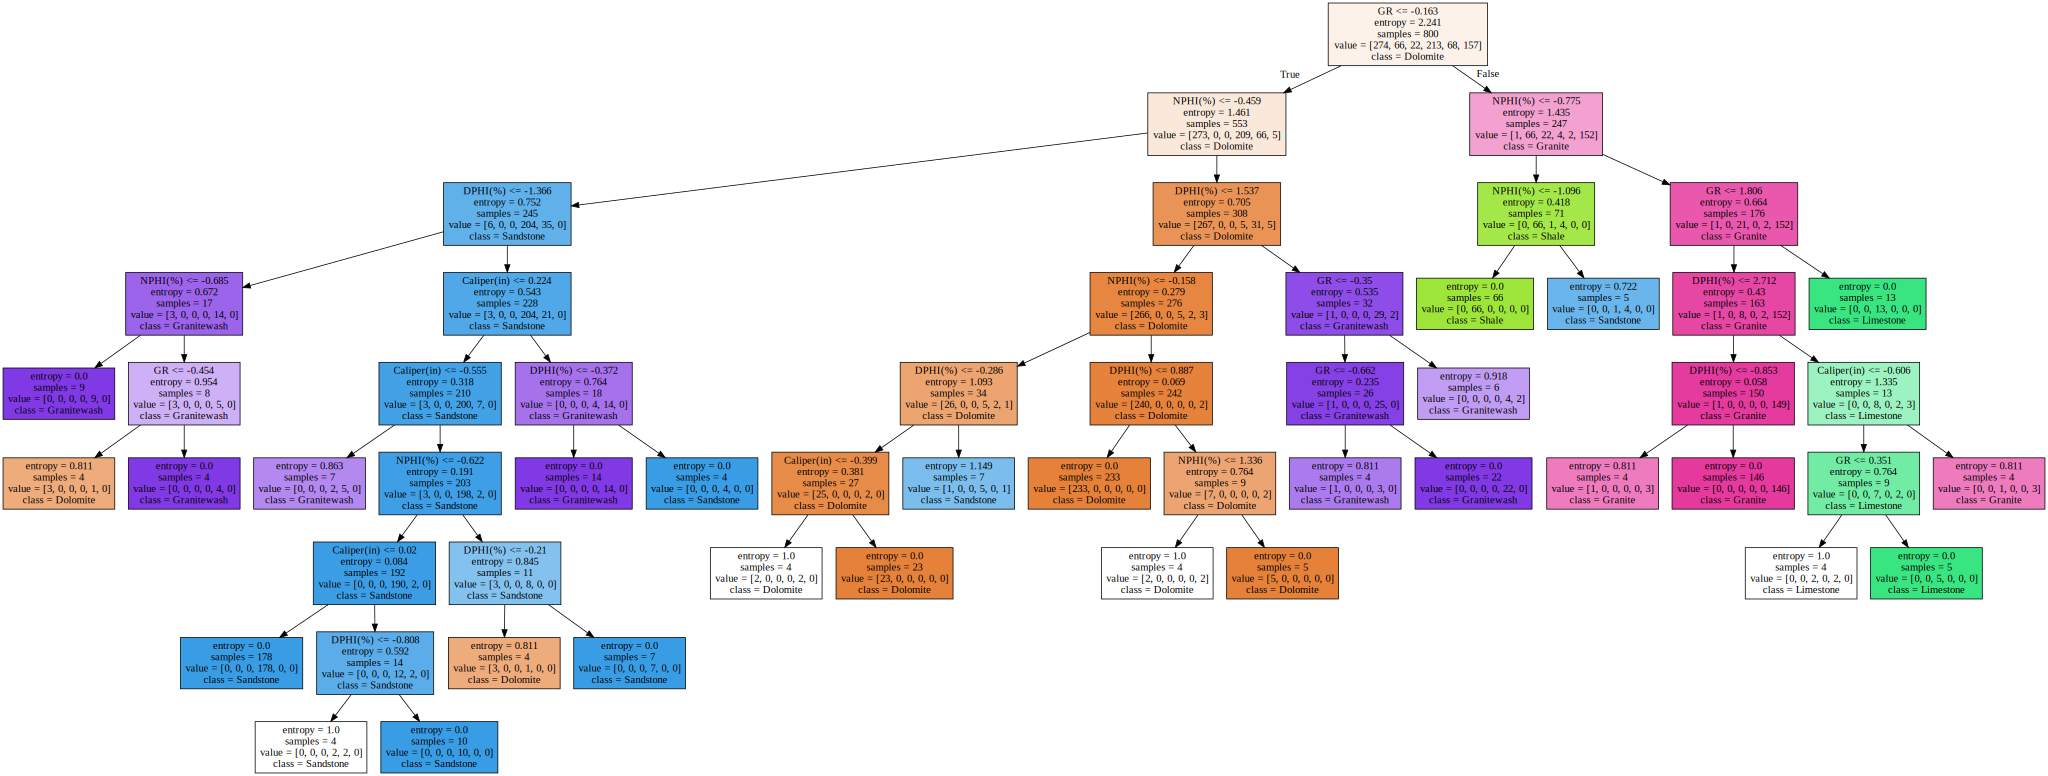

In [126]:
dot_data = tree.export_graphviz(dtc_104_fit, out_file=None, feature_names = x_features, class_names = y_target, filled=True)
graph = graphviz.Source(dot_data, format="png") 
graph

### Testing Decision Tree on Test Data

In [127]:
y_dtc = dtc_104.predict(x_test)

In [128]:
print('max_depth = 20, min_samples_leaf = 4')
print('\n')
print(confusion_matrix(y_test,y_dtc))  ## TN: C00, FN: C10, TP: C11, FP: C01
print('\n')
print(classification_report(y_test,y_dtc))

max_depth = 20, min_samples_leaf = 4


[[64  0  0  4  1  0]
 [ 0 16  0  0  0  0]
 [ 0  0  6  0  0  0]
 [ 0  0  0 51  1  1]
 [ 2  0  2  2 11  0]
 [ 0  0  0  2  1 37]]


              precision    recall  f1-score   support

    Dolomite       0.97      0.93      0.95        69
     Granite       1.00      1.00      1.00        16
 Granitewash       0.75      1.00      0.86         6
   Limestone       0.86      0.96      0.91        53
   Sandstone       0.79      0.65      0.71        17
       Shale       0.97      0.93      0.95        40

    accuracy                           0.92       201
   macro avg       0.89      0.91      0.90       201
weighted avg       0.92      0.92      0.92       201



## Training and Testing on KNN

In [91]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix

In [129]:
error_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    y_knn = knn.predict(x_test)
    error_rate.append(np.mean(y_knn != y_test))

Text(0, 0.5, 'Error Rate')

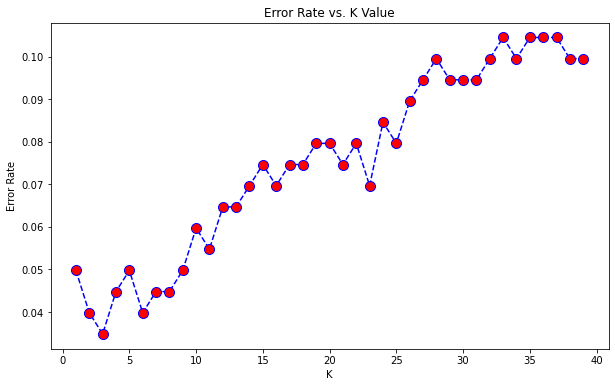

In [130]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [131]:
knn_3 = KNeighborsClassifier(n_neighbors=3)
knn_3.fit(x_train, y_train)
y_knn_3 = knn_3.predict(x_test)

In [132]:
print('Sample=0.8, K=3')
print('\n')
print(confusion_matrix(y_test, y_knn_3))
print('\n')
print(classification_report(y_test, y_knn_3))

Sample=0.8, K=3


[[65  0  0  4  0  0]
 [ 0 16  0  0  0  0]
 [ 0  0  6  0  0  0]
 [ 0  0  0 52  0  1]
 [ 0  0  0  0 17  0]
 [ 0  0  0  0  2 38]]


              precision    recall  f1-score   support

    Dolomite       1.00      0.94      0.97        69
     Granite       1.00      1.00      1.00        16
 Granitewash       1.00      1.00      1.00         6
   Limestone       0.93      0.98      0.95        53
   Sandstone       0.89      1.00      0.94        17
       Shale       0.97      0.95      0.96        40

    accuracy                           0.97       201
   macro avg       0.97      0.98      0.97       201
weighted avg       0.97      0.97      0.97       201

